In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [17]:
df =  pd.read_csv('credit_rating_prediction_dataset.csv')
df

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,997,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,998,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,...,car,38,none,own,1,skilled,1,none,yes,good
998,999,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [18]:
# split the dataset into labels and target variable 
X=df.drop("class", axis=1)
y=df["class"]

In [19]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
df.columns

Index(['id', 'checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1000 non-null   int64 
 1   checking_status         1000 non-null   object
 2   duration                1000 non-null   int64 
 3   credit_history          1000 non-null   object
 4   purpose                 1000 non-null   object
 5   credit_amount           1000 non-null   int64 
 6   savings_status          1000 non-null   object
 7   employment              1000 non-null   object
 8   installment_commitment  1000 non-null   int64 
 9   personal_status         1000 non-null   object
 10  other_parties           1000 non-null   object
 11  residence_since         1000 non-null   int64 
 12  property_magnitude      1000 non-null   object
 13  age                     1000 non-null   int64 
 14  other_payment_plans     1000 non-null   object
 15  housi

In [28]:
# Identify object and numeric columns
object_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

In [45]:
# Apply StandardScaler to numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [29]:
# Apply Label Encoding to object columns
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [31]:
#Perform logistic regression(classification)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
#Make prediction on testing set
y_test_pred = model.predict(X_test)

In [33]:

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(comparison_df[0:15])
print(comparison_df[100:])

    Actual Predicted
507    bad      good
818   good       bad
452   good      good
368    bad       bad
242    bad      good
929   good      good
262   good      good
810   good      good
318   good      good
49    good      good
446    bad       bad
142   good      good
968   good      good
345   good      good
971   good      good
    Actual Predicted
335    bad      good
13     bad      good
911    bad       bad
156   good      good
428   good      good
..     ...       ...
430   good      good
874   good       bad
550   good      good
608   good      good
207   good      good

[100 rows x 2 columns]


In [34]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.7250


In [35]:
# confusion matrix
con_mat = confusion_matrix(y_test, y_test_pred)
print(con_mat)

[[ 20  39]
 [ 16 125]]


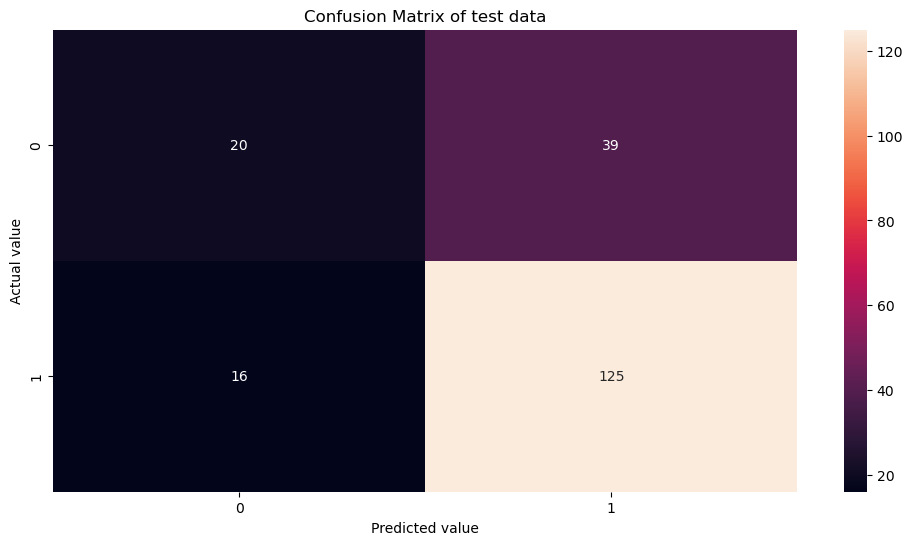

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of test data")
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         bad       0.56      0.34      0.42        59
        good       0.76      0.89      0.82       141

    accuracy                           0.72       200
   macro avg       0.66      0.61      0.62       200
weighted avg       0.70      0.72      0.70       200



In [38]:
TN = con_mat[0][0]
FP = con_mat[0][1]
FN = con_mat[1][0]
TP = con_mat[1][1]

In [39]:
recall = TP/(TP+FN)
print("Recall =", recall)

Recall = 0.8865248226950354


In [40]:
precision = TP/(TP+FP)
print("Precision =",precision)

Precision = 0.7621951219512195


In [41]:
specificity = TN/(TN+FP)
print("Specificity =",specificity)


Specificity = 0.3389830508474576


In [42]:
accuracy =(TP+TN) / (TP+FP+FN+TN)
print("Accuracy =",accuracy) 

Accuracy = 0.725


In [48]:
# Make new prediction
print("*** Making Prediction for the new data **")
new_data = np.array([
    [9,160,70,20,80,28,0.5,34,9,160,70,20,80,28,0.5,34,9,160,70,20,80],
    [0,104,70,15,0,21,0.1,29,0,104,70,15,0,21,0.1,29,0,104,70,15,0],
    [2,158,90,0,0,31.6,1.072,66,2,158,90,0,0,31.6,1.072,66,2,158,90,0,0,],
    [1,100,66,15,56,23.6,0.666,26,1,100,66,15,56,23.6,0.666,26,1,100,66,15,56]
]) 

*** Making Prediction for the new data **


In [49]:
#Assuming you have unseen data as a numpy array named "new_data"
new_data_df = pd.DataFrame (data=new_data, columns=X_train.columns) # Create Dataframe with matcing column

In [50]:
new_data_df = new_data_df.fillna(0)
print(new_data_df)

    id  checking_status  duration  credit_history  purpose  credit_amount  \
0  9.0            160.0      70.0            20.0     80.0           28.0   
1  0.0            104.0      70.0            15.0      0.0           21.0   
2  2.0            158.0      90.0             0.0      0.0           31.6   
3  1.0            100.0      66.0            15.0     56.0           23.6   

   savings_status  employment  installment_commitment  personal_status  ...  \
0           0.500        34.0                     9.0            160.0  ...   
1           0.100        29.0                     0.0            104.0  ...   
2           1.072        66.0                     2.0            158.0  ...   
3           0.666        26.0                     1.0            100.0  ...   

   residence_since  property_magnitude   age  other_payment_plans  housing  \
0             20.0                80.0  28.0                0.500     34.0   
1             15.0                 0.0  21.0                0.

In [51]:
#Scale and Predict
new_data_scaled = scaler.transform(new_data_df)
new_data_scaled

array([[ 9.00000000e+00,  1.60000000e+02,  7.00000000e+01,
         2.00000000e+01,  8.00000000e+01,  2.80000000e+01,
         5.00000000e-01,  3.40000000e+01,  9.00000000e+00,
         1.60000000e+02,  7.00000000e+01,  2.00000000e+01,
         8.00000000e+01,  2.80000000e+01,  5.00000000e-01,
         3.40000000e+01,  9.00000000e+00,  1.60000000e+02,
         7.00000000e+01,  2.00000000e+01,  8.00000000e+01],
       [ 1.33226763e-17,  1.04000000e+02,  7.00000000e+01,
         1.50000000e+01,  6.66133815e-18,  2.10000000e+01,
         1.00000000e-01,  2.90000000e+01,  8.88178420e-18,
         1.04000000e+02,  7.00000000e+01,  1.50000000e+01,
        -6.43929354e-17,  2.10000000e+01,  1.00000000e-01,
         2.90000000e+01,  8.88178420e-18,  1.04000000e+02,
         7.00000000e+01,  1.50000000e+01, -3.10862447e-17],
       [ 2.00000000e+00,  1.58000000e+02,  9.00000000e+01,
        -2.44249065e-17,  6.66133815e-18,  3.16000000e+01,
         1.07200000e+00,  6.60000000e+01,  2.00000000e

In [52]:
column_names =['id', 'checking_status', 'duration', 'credit_history', 'purpose','credit_amount', 'savings_status', 'employment',
        'installment_commitment', 'personal_status', 'other_parties','residence_since', 'property_magnitude', 'age', 'other_payment_plans',
        'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone','foreign_worker']

In [53]:
#create a Dataframe (otherwise we will get a warning )
predict_df = pd.DataFrame(new_data_scaled, columns=column_names)
predict_df

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,9.000000e+00,160.0,70.0,2.000000e+01,8.000000e+01,28.0,0.500,34.0,9.000000e+00,160.0,...,2.000000e+01,8.000000e+01,28.0,0.500,34.0,9.000000e+00,160.0,70.0,2.000000e+01,8.000000e+01
1,1.332268e-17,104.0,70.0,1.500000e+01,6.661338e-18,21.0,0.100,29.0,8.881784e-18,104.0,...,1.500000e+01,-6.439294e-17,21.0,0.100,29.0,8.881784e-18,104.0,70.0,1.500000e+01,-3.108624e-17
2,2.000000e+00,158.0,90.0,-2.442491e-17,6.661338e-18,31.6,1.072,66.0,2.000000e+00,158.0,...,2.220446e-17,-6.439294e-17,31.6,1.072,66.0,2.000000e+00,158.0,90.0,8.881784e-18,-3.108624e-17
3,1.000000e+00,100.0,66.0,1.500000e+01,5.600000e+01,23.6,0.666,26.0,1.000000e+00,100.0,...,1.500000e+01,5.600000e+01,23.6,0.666,26.0,1.000000e+00,100.0,66.0,1.500000e+01,5.600000e+01


In [54]:
prediction = model.predict(predict_df)
prediction

array(['good', 'good', 'good', 'good'], dtype=object)

In [56]:
# Saving Model (and anything esle as pickle file )
import joblib
joblib.dump(model,'final_diabetes_model.pkl')
joblib.dump(model,'final_credit_model.pkl')
joblib.dump(list(X.columns), 'credit_column_names.pkl')

['credit_column_names.pkl']

In [57]:
#Loading Model
col_names = joblib.load('credit_column_names.pkl')
loaded_model = joblib.load('final_credit_model.pkl') 

In [58]:
print("*** Making predictions for new data using loaded model ***")
new_data = np.array([
    [9,160,70,20,80,28,0.5,34,9,160,70,20,80,28,0.5,34,9,160,70,20,80],
    [0,104,70,15,0,21,0.1,29,0,104,70,15,0,21,0.1,29,0,104,70,15,0]
]) 
new_data_df = pd.DataFrame (data=new_data, columns=X_train.columns)

new_data_df = new_data_df.fillna(0)
new_data_scaled = scaler.transform(new_data_df)

*** Making predictions for new data using loaded model ***


In [59]:
predict_df = pd.DataFrame(new_data_scaled, columns=col_names)
predict_df

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,9.000000e+00,160.0,70.0,20.0,8.000000e+01,28.0,0.5,34.0,9.000000e+00,160.0,...,20.0,8.000000e+01,28.0,0.5,34.0,9.000000e+00,160.0,70.0,20.0,8.000000e+01
1,1.332268e-17,104.0,70.0,15.0,6.661338e-18,21.0,0.1,29.0,8.881784e-18,104.0,...,15.0,-6.439294e-17,21.0,0.1,29.0,8.881784e-18,104.0,70.0,15.0,-3.108624e-17


In [60]:
prediction = loaded_model.predict(predict_df)
prediction

array(['good', 'good'], dtype=object)